In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix


In [18]:
# Load datasets from MIT-BIH
train_data = pd.read_csv('/Users/ohajati/Desktop/ECG/mitbih_train.csv', header=None)  
test_data = pd.read_csv('/Users/ohajati/Desktop/ECG/mitbih_test.csv', header=None)    

# Load datasets from PTBDB
ptbdb_normal = pd.read_csv('/Users/ohajati/Desktop/ECG/ptbdb_normal.csv', header=None)  
ptbdb_abnormal = pd.read_csv('/Users/ohajati/Desktop/ECG/ptbdb_abnormal.csv', header=None)





In [19]:
# Check for missing values and data types
print(train_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB
None


In [5]:
# Split MIT-BIH training data into features and target
X_train_mitbih = train_data.iloc[:, :-1].values
y_train_mitbih = train_data.iloc[:, -1].values

X_test_mitbih = test_data.iloc[:, :-1].values
y_test_mitbih = test_data.iloc[:, -1].values

In [11]:
y_train_mitbih


array([0., 0., 0., ..., 4., 4., 4.])

In [12]:
# Normalize MIT-BIH data
scaler_mitbih = StandardScaler()
X_train_mitbih_scaled = scaler_mitbih.fit_transform(X_train_mitbih)
X_test_mitbih_scaled = scaler_mitbih.transform(X_test_mitbih)

In [15]:
# Build a neural network model for MIT-BIH
model_mitbih = keras.Sequential([
    layers.Input(shape=(X_train_mitbih_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [20]:
model_mitbih.compile(optimizer='adam',
                     loss='binary_crossentropy',  
                     metrics=['accuracy'])

In [21]:
# Train the model on MIT-BIH data
model_mitbih.fit(X_train_mitbih_scaled, y_train_mitbih, epochs=50, batch_size=32)

Epoch 1/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 1s 268us/step - accuracy: 0.6228 - loss: -14163.5156
Epoch 2/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 1s 260us/step - accuracy: 0.6094 - loss: -357684.5625
Epoch 3/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 1s 260us/step - accuracy: 0.6049 - loss: -1472605.3750
Epoch 4/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 1s 264us/step - accuracy: 0.6029 - loss: -3634591.2500
Epoch 5/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 1s 263us/step - accuracy: 0.6001 - loss: -7023640.5000
Epoch 6/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 1s 264us/step - accuracy: 0.6026 - loss: -11668049.0000
Epoch 7/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 1s 271us/step - accuracy: 0.6033 - loss: -17891104.0000
Epoch 8/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 1s 271us/step - accuracy: 0.6032 - loss: -26528866.0000
Epoch 9/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 1s 263us/step - accuracy: 0.5998 - loss: -37076872.0000
Epoch 10/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 1s 263us/step - accuracy: 0.6084 - loss: -49053872.0000
Epoch 11/50
2737/2737 ━━━━━

In [22]:
# Evaluate the model on the MIT-BIH test set
val_loss_mitbih, val_accuracy_mitbih = model_mitbih.evaluate(X_test_mitbih_scaled, y_test_mitbih)
print(f"MIT-BIH Test Loss: {val_loss_mitbih}, Test Accuracy: {val_accuracy_mitbih}")

685/685 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step - accuracy: 0.6906 - loss: 1273438464.0000
MIT-BIH Test Loss: -5201054208.0, Test Accuracy: 0.595651388168335


## Potential reasons for low performances: Model Complexitye, Data Imbalance,Feature Scaling,Learning Rate.

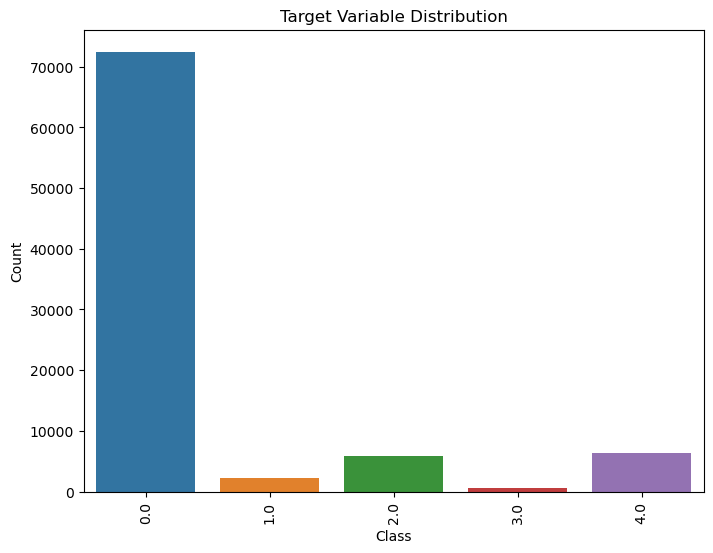

In [28]:

import seaborn as sns

# Assuming y_train is your target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_mitbih)
plt.title('Target Variable Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [34]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights
classes = np.unique(y_train_mitbih)  # Get unique classes from your target variable
class_weights = compute_class_weight('balanced', classes=classes, y=y_train_mitbih)

# Convert to dictionary format
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Now use this class_weight_dict in model fitting
model_mitbih.fit(X_train_mitbih, y_train_mitbih, epochs=50, batch_size=32, class_weight=class_weight_dict)


Epoch 1/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 1s 314us/step - accuracy: 0.1129 - loss: -6898501632.0000
Epoch 2/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 1s 317us/step - accuracy: 0.0648 - loss: -8531343360.0000
Epoch 3/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 1s 266us/step - accuracy: 0.0512 - loss: -9612286976.0000
Epoch 4/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 1s 273us/step - accuracy: 0.0442 - loss: -11093712896.0000
Epoch 5/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 1s 267us/step - accuracy: 0.0392 - loss: -11808204800.0000
Epoch 6/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 1s 265us/step - accuracy: 0.0360 - loss: -12622606336.0000
Epoch 7/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 1s 266us/step - accuracy: 0.0323 - loss: -14012122112.0000
Epoch 8/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 1s 266us/step - accuracy: 0.0292 - loss: -15667575808.0000
Epoch 9/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 1s 271us/step - accuracy: 0.0282 - loss: -16563968000.0000
Epoch 10/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 1s 274us/step - accuracy: 0.0269 - loss: -181775912

In [35]:
from sklearn.model_selection import train_test_split

# Load datasets from PTBDB
ptbdb_normal = pd.read_csv('/Users/ohajati/Desktop/ECG/ptbdb_normal.csv', header=None)  # Adjust the file path
ptbdb_abnormal = pd.read_csv('/Users/ohajati/Desktop/ECG/ptbdb_abnormal.csv', header=None)  # Adjust the file path

# Combine PTBDB datasets and prepare for training
normal_labels = np.zeros(ptbdb_normal.shape[0])  # Label normal as 0
abnormal_labels = np.ones(ptbdb_abnormal.shape[0])  # Label abnormal as 1

X_ptbdb = pd.concat([ptbdb_normal, ptbdb_abnormal], ignore_index=True).values
y_ptbdb = np.concatenate([normal_labels, abnormal_labels])

# Normalize PTBDB data
scaler_ptbdb = StandardScaler()
X_ptbdb_scaled = scaler_ptbdb.fit_transform(X_ptbdb)

# Split PTBDB data into training and validation sets
X_train_ptbdb, X_val_ptbdb, y_train_ptbdb, y_val_ptbdb = train_test_split(X_ptbdb_scaled, y_ptbdb, test_size=0.2, random_state=42)

# Build a neural network model for PTBDB
model_ptbdb = keras.Sequential([
    layers.Input(shape=(X_train_ptbdb.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Adjust for multi-class if needed
])

# Compile the model
model_ptbdb.compile(optimizer='adam',
                    loss='binary_crossentropy',  # Change if multi-class
                    metrics=['accuracy'])

# Train the model on PTBDB data
model_ptbdb.fit(X_train_ptbdb, y_train_ptbdb, epochs=50, batch_size=32, validation_data=(X_val_ptbdb, y_val_ptbdb))

# Evaluate the model on the PTBDB validation set
val_loss_ptbdb, val_accuracy_ptbdb = model_ptbdb.evaluate(X_val_ptbdb, y_val_ptbdb)
print(f"PTBDB Validation Loss: {val_loss_ptbdb}, Validation Accuracy: {val_accuracy_ptbdb}")

Epoch 1/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.8884 - loss: 0.2611 - val_accuracy: 0.9979 - val_loss: 0.0099
Epoch 2/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - accuracy: 0.9985 - loss: 0.0068 - val_accuracy: 0.9928 - val_loss: 0.0182
Epoch 3/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - accuracy: 0.9979 - loss: 0.0088 - val_accuracy: 0.9997 - val_loss: 0.0011
Epoch 4/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 1.0000 - loss: 4.8106e-04 - val_accuracy: 0.9976 - val_loss: 0.0049
Epoch 5/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - accuracy: 1.0000 - loss: 4.3977e-04 - val_accuracy: 1.0000 - val_loss: 5.0181e-04
Epoch 6/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - accuracy: 1.0000 - loss: 1.1060e-04 - val_accuracy: 1.0000 - val_loss: 4.3297e-04
Epoch 7/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - accuracy: 1.0000 - loss: 7.5183e-05 - val_accuracy: 1.0000 - val_loss: 3.6468e-04
Epoch 8/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accura